In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]
train_path = "F:\Research Final\Bank dataset\BankNote_train(224)"
valid_path = "F:\Research Final\Bank dataset\BankNote_validation(224_224)"
test_path = "F:\Research Final\Bank dataset\BankNote_test(224_224)"

In [3]:

from glob import glob
folders = glob('F:\Research Final\Bank dataset\BankNote_train(224)/*')

In [4]:
folders

['F:\\Research Final\\Bank dataset\\BankNote_train(224)\\1000_tk',
 'F:\\Research Final\\Bank dataset\\BankNote_train(224)\\100_tk',
 'F:\\Research Final\\Bank dataset\\BankNote_train(224)\\10_tk',
 'F:\\Research Final\\Bank dataset\\BankNote_train(224)\\20_tk',
 'F:\\Research Final\\Bank dataset\\BankNote_train(224)\\2_tk',
 'F:\\Research Final\\Bank dataset\\BankNote_train(224)\\500_tk',
 'F:\\Research Final\\Bank dataset\\BankNote_train(224)\\50_tk',
 'F:\\Research Final\\Bank dataset\\BankNote_train(224)\\5_tk']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [6]:

train_set = train_datagen.flow_from_directory('F:\Research Final\Bank dataset\BankNote_train(224)',
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

Found 63723 images belonging to 8 classes.


In [7]:
valid_set = valid_datagen.flow_from_directory('F:\Research Final\Bank dataset\BankNote_validation(224_224)',
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')


Found 3537 images belonging to 8 classes.


In [8]:
test_set = valid_datagen.flow_from_directory('F:\Research Final\Bank dataset\BankNote_test(224_224)',
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

Found 3537 images belonging to 8 classes.


In [9]:
mobile = MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [10]:
for layer in mobile.layers:
    layer.trainable = False

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Conv2D , MaxPooling2D , Dense, Flatten, Dropout

a = Flatten(input_shape = (224,224,3))(mobile.output)




# Add a fully connected layer with 512 hidden units and ReLU activation
a = Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(a)
a = Dropout(0.3)(a)

a = Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(a)
a = Dropout(0.3)(a)

a = Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(a)
# Add a dropout rate of 0.3
a = Dropout(0.3)(a)

# Add a final sigmoid layer for classification
a = Dense(len(folders), activation='softmax')(a)

model = tf.keras.models.Model(mobile.input, a)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [16]:
history = model.fit_generator(train_set,
                    validation_data=valid_set,
                    epochs= 10, 
                    steps_per_epoch=len(train_set),
                    validation_steps=len(valid_set))

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
249/249 [==============================] - 1658s 7s/step - loss: 1.9730 - accuracy: 0.8783 - val_loss: 1.2288 - val_accuracy: 0.9969
Epoch 2/10
249/249 [==============================] - 1023s 4s/step - loss: 1.0527 - accuracy: 0.9884 - val_loss: 0.8403 - val_accuracy: 0.9969
Epoch 3/10
249/249 [==============================] - 1002s 4s/step - loss: 0.7347 - accuracy: 0.9931 - val_loss: 0.6183 - val_accuracy: 0.9943
Epoch 4/10
249/249 [==============================] - 1004s 4s/step - loss: 0.5523 - accuracy: 0.9930 - val_loss: 0.4592 - val_accuracy: 0.9975
Epoch 5/10
249/249 [==============================] - 1001s 4s/step - loss: 0.4237 - accuracy: 0.9939 - val_loss: 0.3490 - val_accuracy: 0.9977
Epoch 6/10
249/249 [==============================] - 1002s 4s/step - loss: 0.3202 - accuracy: 0.9949 - val_loss: 0.2774 - val_accuracy: 0.9938
Epoch 7/10
249/249 [==============================] - 1005s 4s/step - loss: 0.2466 - accuracy: 0.9954 - val_loss: 0.2226 - val_accuracy:

In [17]:
predictions = model.evaluate(test_set,batch_size=256)

predictions




14/14 [==============================] - 46s 3s/step - loss: 0.1076 - accuracy: 1.0000


[0.10764965415000916, 1.0]

In [18]:
import matplotlib.pyplot as plt

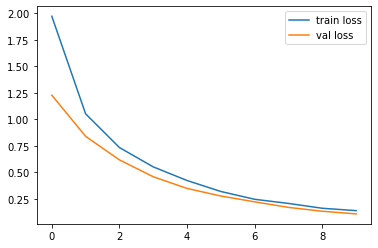

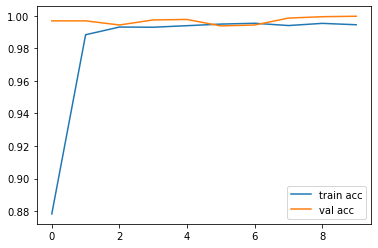

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')